In [9]:
from faker import Faker
import pandas as pd
import numpy as np

# Create a Faker instance
faker = Faker()

# Define the doctor specialities
# doctor_specialities = [
#     'Dermatologist', 'Allergist', 'Gastroenterologist', 'Hepatologist', 'Osteopathic',
#     'Endocrinologist', 'Pulmonologist', 'Cardiologist', 'Neurologist', 'Internal Medicine',
#     'Pediatrician', 'Common Cold', 'Cardiologist', 'Phlebologist', 'Osteoarthritis',
#     'Rheumatologists', 'Otolaryngologist', 'Dermatologists', 'Gynecologist'
# ]

df = pd.read_csv('../Trials/output.csv')

doctor_specialities = df['Speciality'].to_list()

# Initialize lists to store data
specialities = []
doctor_names = []
ratings = []
experiences = []
distances = []
availabilities = []
costs = []

# Generate data for each speciality
for speciality in doctor_specialities:
    for _ in range(5000):
        doctor_name = "Dr. " + faker.first_name() + ' ' + faker.last_name()
        
        # Generate ratings using Beta distribution (ensure values in [1, 10] range)
        rating = np.clip(np.random.normal(loc=5, scale=2), 0, 10)  # Shift and scale to fit [1, 10] range
        
        # Generate experience using Exponential distribution (ensure non-negative values)
        experience = np.clip(np.random.exponential(scale=5), 0, 30) # Example scale parameter
        
        # Generate distances using Normal distribution (ensure non-negative values)
        distance = np.clip(np.random.normal(loc=5, scale=2), 0, 10)  # Example mean and standard deviation
        
        # Generate availability using Bernoulli distribution (ensure non-negative values)
        availability = np.random.binomial(n=1, p=0.8)  # Example probability of availability
        
        # Generate costs using Log-normal distribution (ensure non-negative values)
        cost = max(0, np.random.lognormal(mean=2, sigma=1))  # Example mean and standard deviation
        
        specialities.append(speciality)
        doctor_names.append(doctor_name)
        ratings.append(rating)
        experiences.append(experience)
        distances.append(distance)
        availabilities.append(availability)
        costs.append(cost)

# Create DataFrame
data = {
    'Doctor Speciality': specialities,
    'Doctor Name': doctor_names,
    'Ratings': ratings,
    'Experience': experiences,
    'Distance from Patient': distances,
    'Availability': availabilities,
    'Cost of Services': costs
}

df = pd.DataFrame(data)
# Round off Ratings column to 2 decimal places
df['Ratings'] = df['Ratings'].round(2)
df['Experience'] = df['Experience'].round(2)
df['Distance from Patient'] = df['Distance from Patient'].round(2)
df['Cost of Services'] = df['Cost of Services'].round(2)

# Display DataFrame
print(df.head())

# Write DataFrame to CSV
df.to_csv('doctors_data_multireward.csv', index=False)

        Doctor Speciality          Doctor Name  Ratings  Experience  \
0  Allergy and Immunology       Dr. Aaron Haas     3.42        4.69   
1  Allergy and Immunology     Dr. Toni Holland     3.08        3.88   
2  Allergy and Immunology       Dr. Julie Gray     4.85        0.86   
3  Allergy and Immunology      Dr. Kari Thomas     5.31        3.51   
4  Allergy and Immunology  Dr. William Manning     5.38        8.58   

   Distance from Patient  Availability  Cost of Services  
0                   6.44             0              3.81  
1                   4.51             1              8.42  
2                   7.80             1             27.32  
3                   5.78             0             12.74  
4                   5.28             1              1.64  


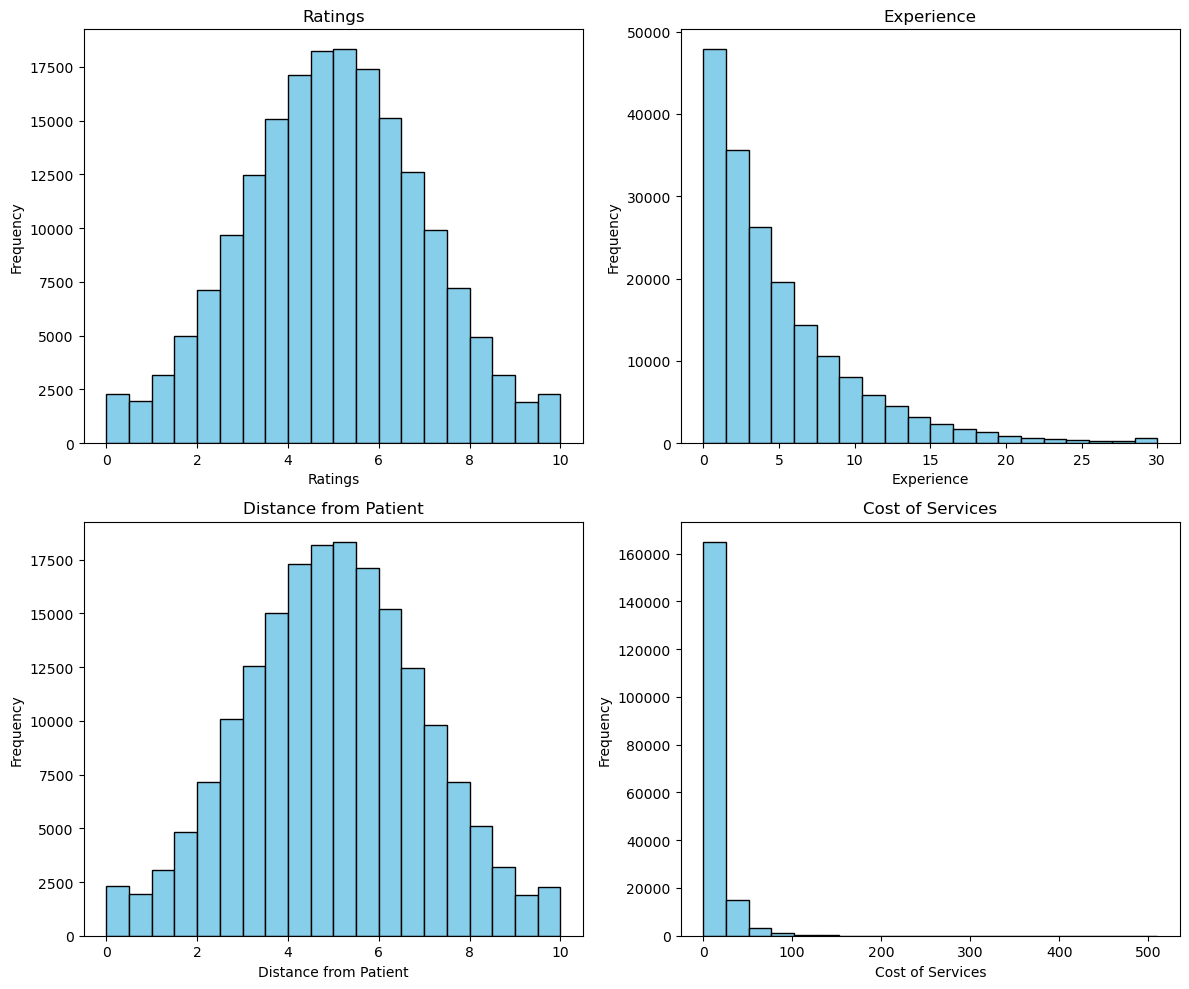

In [10]:
import matplotlib.pyplot as plt

# Define the columns to plot
columns_to_plot = ['Ratings', 'Experience', 'Distance from Patient', 'Cost of Services']

# Create subplots for each column
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
axs = axs.flatten()

# Plot each column
for i, column in enumerate(columns_to_plot):
    ax = axs[i]
    ax.hist(df[column], bins=20, color='skyblue', edgecolor='black')
    ax.set_title(column)
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()